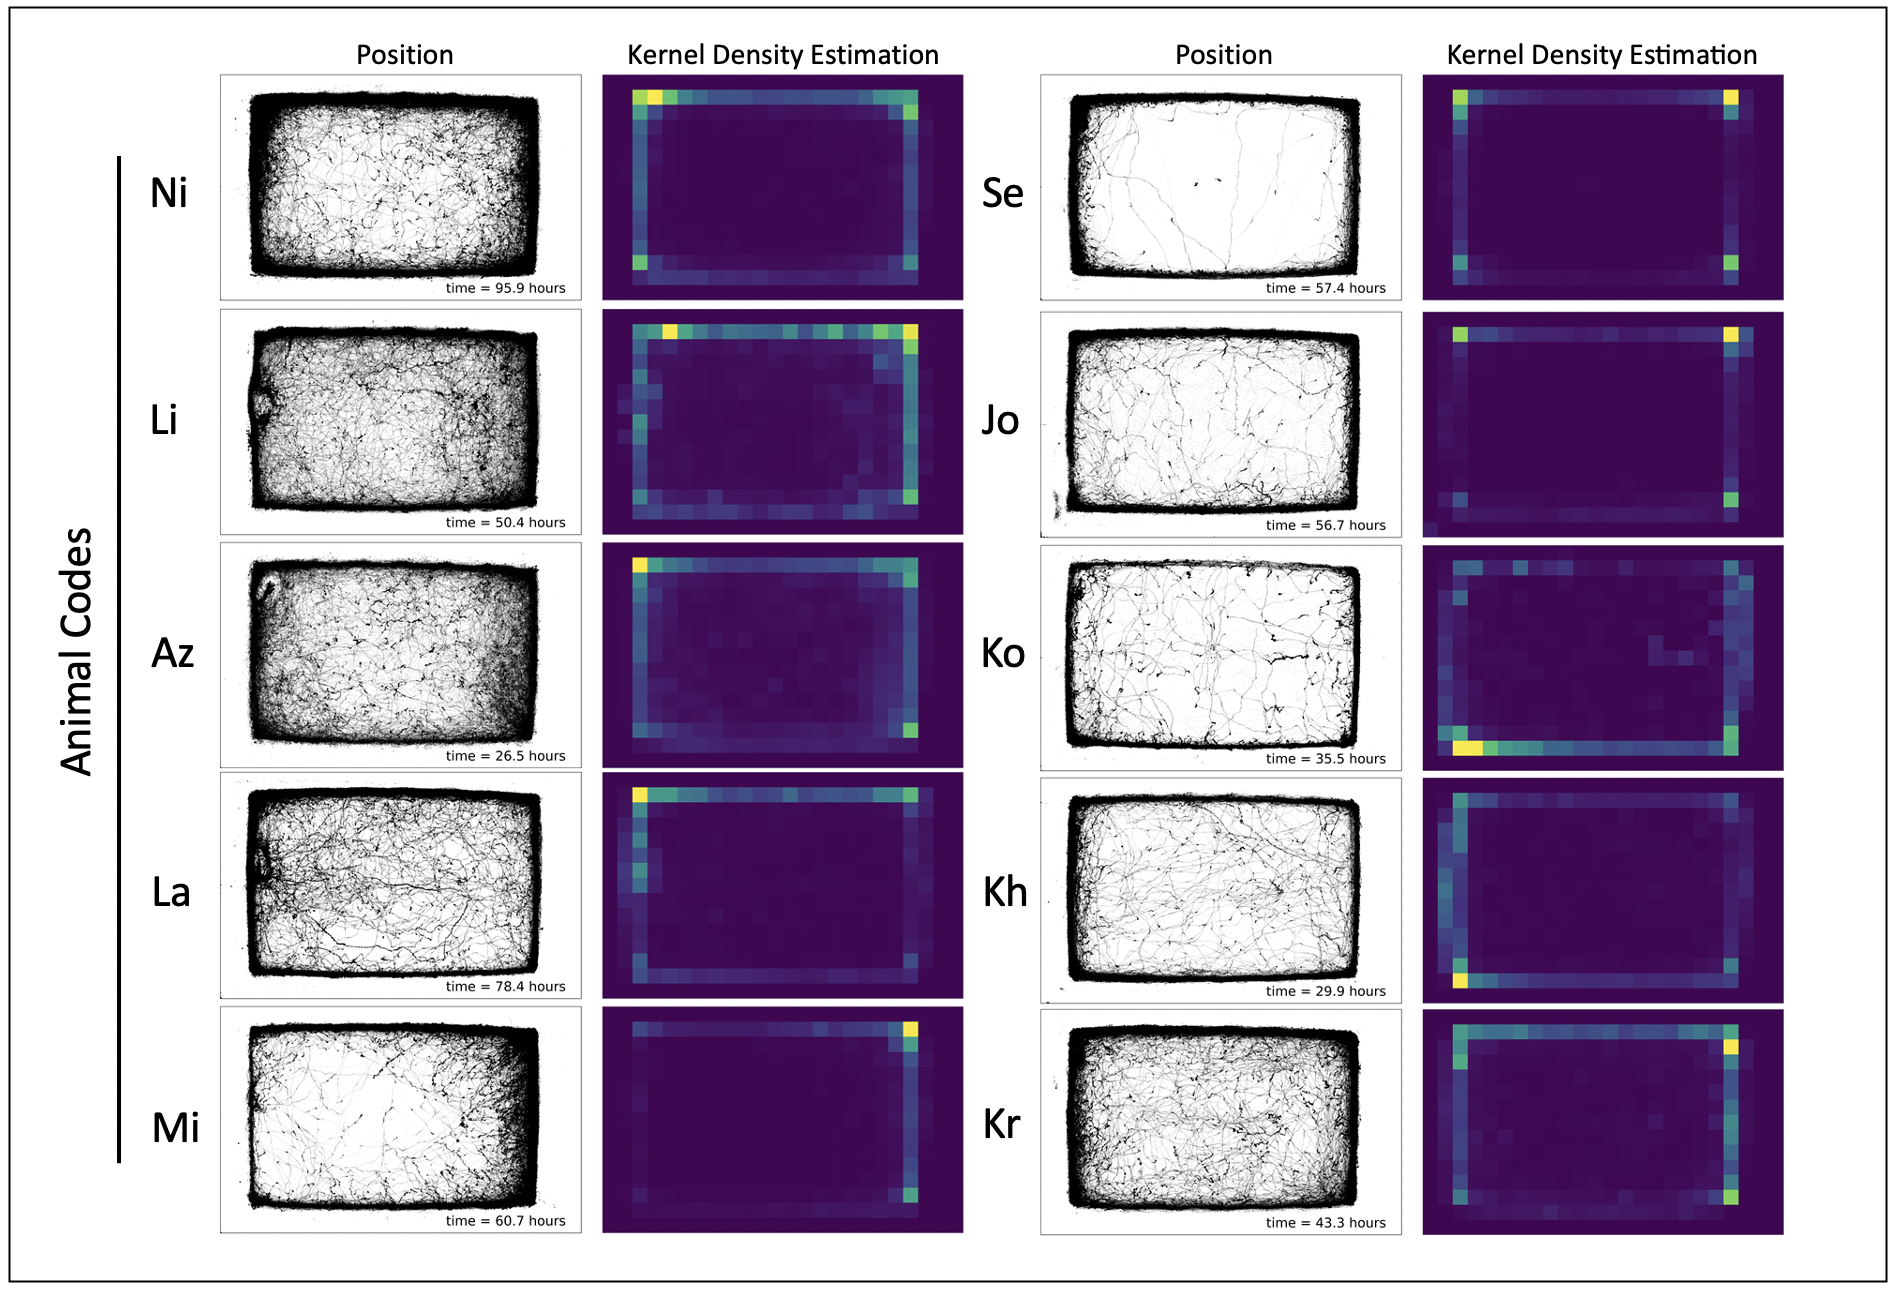

Make something like the above plot, but an actual facet grid. Add bbox to plot and use T-Test to compare in bbox to out of bbox ratios.

In [ ]:
from google.colab import drive
import os
import glob
import pickle

import pandas as pd
import numpy as np
import random
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import LogNorm

from matplotlib.lines import Line2D

import seaborn as sns

from scipy import stats

import seaborn as sns
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
animals = ['azula', 'joseph', 'khorne', 'korra', 'kratos', 'larsson', 'lisbeth', 'mikael', 'ninja', 'seddy']
root_data_dir = r'/content/drive/Shareddrives/Laboratory of Comparative Systems Neuroscience/2 Experiments and Projects/2 Active Projects/FHL_Flume/FHL_ST/DATA/st_bbox__400_220_1550_965/'

path_pkls = [os.path.join(root_data_dir, s,'ff__' + s + '.pkl') for s in animals]
for pkl in path_pkls:
  print(os.path.basename(pkl))
  if os.path.exists(pkl) != True:
    print('DOES NOT EXIST!')

#bbox = [400, 220, 1550, 965] ## x1y1x2y2
bbox = [400, 270, 1450, 915] ## x1y1x2y2

target_dir = root_data_dir

ff__azula.pkl
ff__joseph.pkl
ff__khorne.pkl
ff__korra.pkl
ff__kratos.pkl
ff__larsson.pkl
ff__lisbeth.pkl
ff__mikael.pkl
ff__ninja.pkl
ff__seddy.pkl


In [ ]:

acols = ['lex', 'ley', 'rex', 'rey', 'datetime','mex', 'mey', 'animal']
dat = pd.DataFrame(columns = acols)

pbar = tqdm(total = len(animals), position=0, leave=True)
for animal in animals[0:]:
  path_pkl = [s for s in path_pkls if animal in s][0]
  print(os.path.basename(path_pkl))
  pkl = []
  with (open(path_pkl, "rb")) as openfile:
      while True:
          try:
              pkl.append(pickle.load(openfile))
          except EOFError:
              break
  pkl = pkl[0]
  print(pkl.keys())
  print(pkl['key'])
  print()

  dcols = ['lex', 'ley', 'rex', 'rey', 'datetime']
  df = pd.DataFrame(columns = dcols)

  del pkl['key']
  for idx in pkl:
    pkltmp = pkl[idx]
    for dftmp, times in list(zip(pkltmp[4], pkltmp[3])):
      cols = dftmp.columns
      lex = np.array(dftmp[cols[0]])
      ley = np.array(dftmp[cols[1]])
      rex = np.array(dftmp[cols[3]])
      rey = np.array(dftmp[cols[4]])
      
      dftmp = pd.DataFrame(list(zip(lex, ley, rex, rey, times)),
                           columns = dcols)
      df = pd.concat([df, dftmp])

  mex = (np.array(df['lex'])+np.array(df['rex']))/2
  mey = (np.array(df['ley'])+np.array(df['rey']))/2
  df['mex'] = mex
  df['mey'] = mey
  df['animal'] = [animal[0:2]]*len(mex)

  dat = pd.concat([dat, df])

  pbar.update(n=1)
pbar.close()

  0%|          | 0/10 [00:00<?, ?it/s]

ff__azula.pkl
dict_keys([0, 1, 2, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 10%|█         | 1/10 [00:03<00:34,  3.82s/it]

ff__joseph.pkl
dict_keys([0, 1, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 20%|██        | 2/10 [00:11<00:47,  5.90s/it]

ff__khorne.pkl
dict_keys([0, 1, 2, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 30%|███       | 3/10 [00:16<00:38,  5.56s/it]

ff__korra.pkl
dict_keys([0, 1, 2, 3, 4, 5, 6, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 40%|████      | 4/10 [00:21<00:31,  5.23s/it]

ff__kratos.pkl
dict_keys([0, 1, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 50%|█████     | 5/10 [00:27<00:27,  5.50s/it]

ff__larsson.pkl
dict_keys([0, 1, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 60%|██████    | 6/10 [00:36<00:27,  6.96s/it]

ff__lisbeth.pkl
dict_keys([0, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 70%|███████   | 7/10 [00:44<00:21,  7.24s/it]

ff__mikael.pkl
dict_keys([0, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 80%|████████  | 8/10 [00:53<00:15,  7.87s/it]

ff__ninja.pkl
dict_keys([0, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



 90%|█████████ | 9/10 [01:06<00:09,  9.40s/it]

ff__seddy.pkl
dict_keys([0, 'key'])
['i', 'h5path', 'nrows', 'datetime', 'dataframe']



100%|██████████| 10/10 [01:15<00:00,  7.56s/it]


In [ ]:
def in_box (point, box):
  x1, x2 = box[0], box[2]
  y1, y2 = box[1], box[3] 
  pbool = False
  x, y = point[0], point[1]
  if x > x1 and x < x2:
    if y > y1 and y < y2:
      pbool = True
  return pbool

mex = np.array(dat['mex'])
mey = np.array(dat['mey'])
points = np.array([mex, mey]).T

pbox = []
for point in points:
  pbool = in_box(point, bbox)
  pbox.append(pbool)

dat['in_bbox'] = pbox

In [ ]:
dts = dat['datetime'].tolist()
HoD = [t.hour + t.minute/60 + t.second/3600 for t in dts]

dat['Hour of day'] = HoD
dat = dat.reset_index()

In [ ]:
dat

,index,lex,ley,rex,rey,datetime,mex,mey,animal,in_bbox,Hour of day
0,0,231.537033,385.297363,219.015625,379.228729,2021-08-03 18:35:40.000100,225.276329,382.263046,az,False,18.594444
1,1,232.403030,385.226868,217.393997,379.799072,2021-08-03 18:35:40.100100,224.898514,382.512970,az,False,18.594444
2,2,231.362442,386.514740,217.014145,381.482697,2021-08-03 18:35:40.200100,224.188293,383.998718,az,False,18.594444
3,3,230.634064,388.532837,216.400528,382.484406,2021-08-03 18:35:40.300100,223.517296,385.508621,az,False,18.594444
4,4,228.729095,391.949402,216.073502,386.483826,2021-08-03 18:35:40.400100,222.401299,389.216614,az,False,18.594444
...,...,...,...,...,...,...,...,...,...,...,...
19248335,25577,236.630280,289.523956,226.041946,278.211487,2021-03-25 20:31:23.700500,231.336113,283.867722,se,False,20.523056
19248336,25578,236.633728,289.286957,226.133057,278.228516,2021-03-25 20:31:23.800500,231.383392,283.757736,se,False,20.523056
19248337,25579,236.555023,289.527802,226.098022,278.607544,2021-03-25 20:31:23.900500,231.326523,284.067673,se,False,20.523056
19248338,25580,236.110413,290.008057,226.145782,279.148712,2021-03-25 20:31:24.000500,231.128098,284.578384,se,False,20.523333


In [ ]:
name_dat = 'allData_ff.pkl'
path_dat = os.path.join(target_dir, name_dat)
dat.to_pickle(path_dat)

In [ ]:
dath = dat.iloc[::1000]

dath = dath.reset_index()
dath

,level_0,index,lex,ley,rex,rey,datetime,mex,mey,animal,in_bbox,Hour of day
0,0,0,231.537033,385.297363,219.015625,379.228729,2021-08-03 18:35:40.000100,225.276329,382.263046,az,False,18.594444
1,1000,1000,1080.154419,1072.350098,1055.639038,1071.490723,2021-08-03 18:37:20.000100,1067.896729,1071.920410,az,False,18.622222
2,2000,2000,1528.458740,805.826965,1537.589844,819.283691,2021-08-03 18:39:00.000100,1533.024292,812.555328,az,False,18.650000
3,3000,3000,1459.659180,281.258881,1442.282104,286.388336,2021-08-03 18:40:40.000100,1450.970642,283.823608,az,False,18.677778
4,4000,4000,1647.200928,209.751968,1657.620117,222.414337,2021-08-03 18:42:20.000100,1652.410522,216.083153,az,False,18.705556
...,...,...,...,...,...,...,...,...,...,...,...,...
19244,19244000,21242,175.358139,283.397614,185.246704,299.885132,2021-03-25 20:24:10.200500,180.302422,291.641373,se,False,20.402778
19245,19245000,22242,163.815247,427.487183,152.084503,412.425323,2021-03-25 20:25:50.200500,157.949875,419.956253,se,False,20.430556
19246,19246000,23242,167.146210,426.092346,152.889679,412.227722,2021-03-25 20:27:30.200500,160.017944,419.160034,se,False,20.458333
19247,19247000,24242,1682.207153,157.734543,1663.645386,155.969574,2021-03-25 20:29:10.200500,1672.926270,156.852058,se,False,20.486111


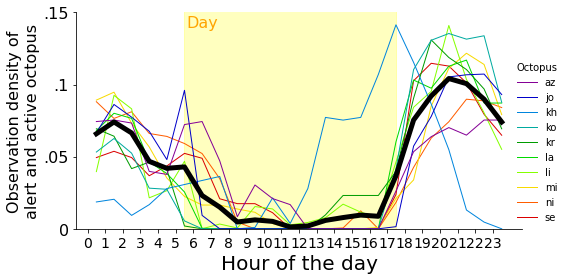

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8,4))

nbins = 24
ax=ax1
g = sns.histplot(data=dath, 
                 x='Hour of day', 
                 stat='density', 
                 element='poly',
                 hue='animal',
                 fill=False,
                 common_norm=False,
                 cumulative=False,
                 bins=nbins,
                 binrange=[0, 24], 
                 linewidth=1,
                 palette='nipy_spectral',
                 ax=ax, 
                 zorder=1)

g1 = sns.histplot(data=dath, 
                 x='Hour of day', 
                 stat='density', 
                 element='poly',
                 fill=False,
                 cumulative=False,
                 common_norm=False,
                 bins=nbins,
                 binrange=[0, 24], 
                 linewidth=5,
                 color='black',
                 ax=ax, 
                 zorder=2)

ax.set_xticks(np.arange(0,24))
ax.set_xticklabels(np.arange(0,24), fontsize=14)
ax.set_xlabel('Hour of the day', fontsize=20)
ax.set_ylabel('Observation density of\nalert and active octopus', fontsize=16)
yticks = [0, .05, .1, .15]
ax.set_yticks(yticks)
ylabs = ['0',  '.05','.1', '.15']
ax.set_yticklabels(ylabs, fontsize=16)

l = sns.move_legend(g, 'right', frameon=False, bbox_to_anchor=(1.1, 0.4), title='Octopus')

x0 = 5.5
x1 = 17.5
rect = plt.Rectangle((x0, 0), x1-x0, .5, color='yellow', alpha=0.25, zorder=0)
ax.add_patch(rect)
ax.text(x0+.1, .14, 'Day', color='orange', zorder=2, fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plot_name = 'wall-preference-stat__HoD.png'
path_plot = os.path.join(target_dir, plot_name)
fig.tight_layout()
fig.savefig(path_plot, dpi=300, bbox_inches='tight')
plt.show(fig)
plt.close(fig)

100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


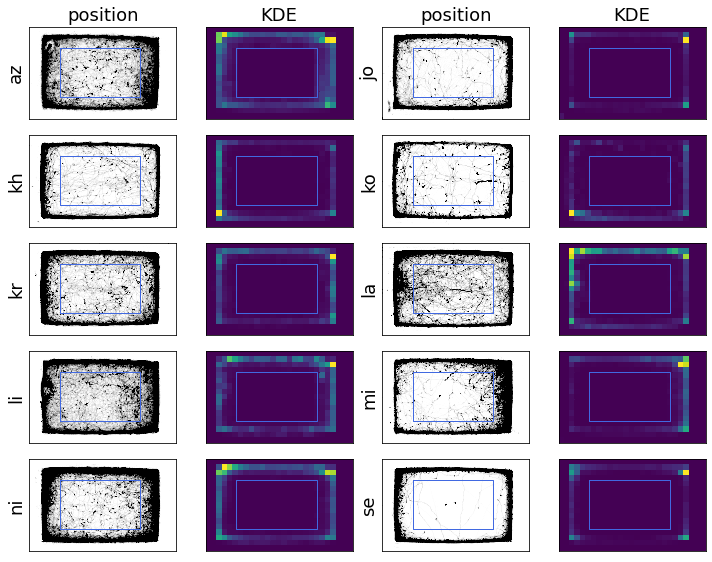

In [ ]:
x1, x2 = bbox[0], bbox[2]
y1, y2 = bbox[1], bbox[3]
xbox = [x1, x2, x2, x1, x1]
ybox = [y1, y1, y2, y2, y1]

t_text_pos = [x1+30, y2+181.5]
tfs = 7
txt_col = 'red'

xlims = [0, 1920]
ylims = [1200, 0]
bbox_cols = ['black', 'black']

figscale = 2.5
nrows = int((len(animals)/2))
ncols = int((len(animals)/5 * 2))
ss = 1

fst = 18
alph = 0.005
color_map = 'viridis'

binwidth = 75
xbins = np.arange(0,xlims[1]+binwidth,binwidth)
ybins = np.arange(0,ylims[0]+binwidth,binwidth)
histbins = [len(xbins), len(ybins)]
histbinrange = [[xlims[0],xlims[1]],[ylims[1], ylims[0]]]
box_col = 'royalblue'

hists = {}
fig, axs = plt.subplots(nrows, ncols, figsize = (figscale*ncols, figscale*nrows))
n = 0
pbar = tqdm(total = int(nrows*(ncols/2)), position=0, leave=True)
for i in range(0, nrows):
  for j in range(0, ncols, 2):
    ax1 = axs[i, j]
    ax2 = axs[i, j+1]
    animal = animals[n][0:2]


    t_txt = ''
    txt_head = ['time in = ', 'time out = ']
    dftmp = dat[dat['animal'] == animal][::ss]
    for ci, pbool in enumerate([True, False]):
      dfp = dftmp[dftmp['in_bbox'] == pbool]

      mex = np.array(dfp['mex'])
      mey = np.array(dfp['mey'])

      hrs_in = round((((len(mex)*ss)/10)/60)/60, 2)
      txt = txt_head[ci] + str(hrs_in) + ' hours\n'
      t_txt = t_txt + txt

      ax1.scatter(mex, mey, color = bbox_cols[ci], s=1, alpha=alph, zorder=2)
    
    #ax2.text(t_text_pos[0],t_text_pos[1], t_txt, color=txt_col, fontsize = tfs, zorder=3)

    mex = np.array(dfp['mex'])
    mey = np.array(dfp['mey'])
    hist = ax2.hist2d(mex, mey, bins = histbins,range=histbinrange, density=True, cmap=color_map)
    hists[n] = [animal, hist]

    ax1.plot(xbox, ybox, color=box_col, linewidth=1,zorder=10)
    ax2.plot(xbox, ybox, color=box_col, linewidth=1,zorder=10)

    ax1.set_ylabel(animal, fontsize=fst, rotation=90)
    if i == 0:
      ax1.set_title('position', fontsize=fst)
      ax2.set_title('KDE', fontsize=fst)

    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax1.set_xlim(xlims)
    ax1.set_ylim(ylims)
    ax2.set_xlim(xlims)
    ax2.set_ylim(ylims)
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    pbar.update(n=1)
    n += 1
pbar.close()

plot_name = 'wall-preference-raw-vis.png'
path_plot = os.path.join(target_dir, plot_name)
fig.tight_layout(h_pad=-30, w_pad=0.75)
fig.savefig(path_plot, dpi=500)
plt.show(fig)
plt.close(fig)

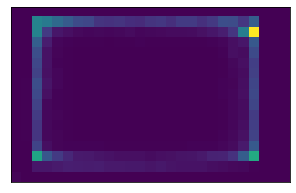

In [ ]:
hsts = []
for key in hists.keys():
  h = hists[key][1][0]
  h = np.rot90(h, k=1)
  h = np.fliplr(np.flip(h))
  hsts.append(h)
hsts = np.array(hsts)
mu = np.mean(hsts, axis=0)

fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax=ax1
ax.imshow(mu)

ax.set_xticks([])
ax.set_yticks([])

plt.show(fig)
plt.close(fig)

In [ ]:
def convert_frame_count_to_hours (nframes):
  h = (((nframes)/10)/60)/60
  return h

n_in = []
n_out = []

for animal in animals:
  animal = animal[0:2]

  dftmp = dat[dat['animal'] == animal][::]
  dfin = dftmp[dftmp['in_bbox'] == True]
  dfout = dftmp[dftmp['in_bbox'] == False]

  tin = convert_frame_count_to_hours(len(dfin))
  tout = convert_frame_count_to_hours(len(dfout))

  n_in.append(tin)
  n_out.append(tout)
n_in = np.array(n_in)
n_out = np.array(n_out)
ratio_in = n_in/(n_out+n_in)
ratio_out = n_out/(n_out+n_in)

df_io = pd.DataFrame(list(zip([s[0:2] for s in animals], n_in, n_out, ratio_in, ratio_out)),
                     columns = ['animal', 't_in', 't_out', 'ratio_in', 'ratio_out'])

In [ ]:
df_io

,animal,t_in,t_out,ratio_in,ratio_out
0,az,2.760000,23.742278,0.104142,0.895858
1,jo,0.563194,56.172694,0.009927,0.990073
2,kh,0.955972,28.896472,0.032023,0.967977
3,ko,1.311056,34.185361,0.036935,0.963065
4,kr,2.109722,41.167472,0.048749,0.951251
5,la,3.234833,75.159556,0.041264,0.958736
6,li,3.808306,46.640111,0.075489,0.924511
7,mi,1.342083,59.394278,0.022097,0.977903
8,ni,1.997417,93.853694,0.020839,0.979161
9,se,0.121083,57.260528,0.002110,0.997890


In [ ]:
name_df_io = 'allData_inOut.pkl'
path_df_io = os.path.join(target_dir, name_df_io)
df_io.to_pickle(path_df_io)

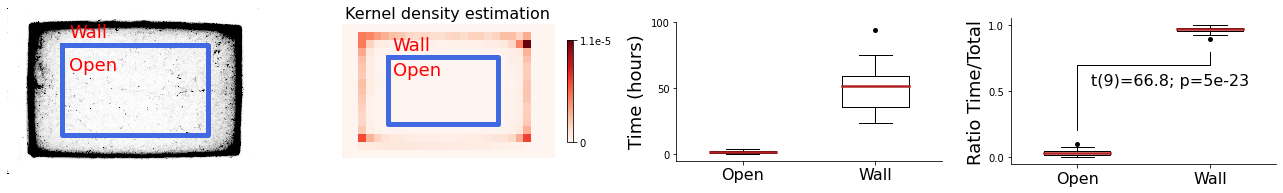

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(18,6))

ax=ax1
ax.scatter(dat['mex'][::10], dat['mey'][::10], color='black', s=1, alpha=0.005)
ax1.plot(np.array(xbox), np.array(ybox), color=box_col, linewidth=5,zorder=1)
ax.text(6*75, 2.8*75, 'Wall', color='red', fontsize=18)
ax.text(6*75, 6*75, 'Open', color='red', fontsize=18)

ax.set_xlim(0,1920)
ax.set_ylim(1200,0)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax=ax2
kde = ax.imshow(mu, zorder=0, cmap='Reds',vmin=0, vmax=np.max(mu))
ax.plot(np.array(xbox)/75, np.array(ybox)/75, color=box_col, linewidth=5,zorder=1, )
cbar = fig.colorbar(kde, ax=ax, shrink=0.25, ticks=[0, np.max(mu)])
cbar.ax.set_yticklabels(['0', '1.1e-5'])
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.text(6, 2.8, 'Wall', color='red', fontsize=18)
ax.text(6, 6, 'Open', color='red', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Kernel density estimation', fontsize=16)

flierprops = dict(marker='.', markerfacecolor='black', markersize=10,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

ax=ax3
ax.boxplot(n_in, positions=[0], widths = [0.5], flierprops=flierprops, medianprops=medianprops)
ax.boxplot(n_out, positions=[1], widths = [0.5], flierprops=flierprops, medianprops=medianprops)
ax.set_aspect(.01)
ax.set_xticks([0,1])
ax.set_xticklabels(['Open', 'Wall'], fontsize=16)
ax.set_yticks([0, 50, 100])
ax.set_ylabel('Time (hours)', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax=ax4
ax.boxplot(ratio_in, positions=[0], widths = [0.5], flierprops=flierprops, medianprops=medianprops)
ax.boxplot(ratio_out, positions=[1], widths = [0.5], flierprops=flierprops, medianprops=medianprops)
yticks = [0, 0.5, 1]
ax.set_yticks(yticks)

out = stats.ttest_ind(ratio_in, ratio_out, equal_var=False, alternative='two-sided')
ax.plot([0, 0, 1, 1], [np.max(ratio_in)+.1, np.min(ratio_out)-.2, np.min(ratio_out)-.2, np.min(ratio_out)-.1], color='black', linewidth=1)
ax.text(.1, np.min(ratio_out)-.35, f't({len(ratio_out)-1})=66.8; p=5e-23', fontsize=16)

#ax.set_ylim(-0.01,1.01)
xticks = [0,1]
xlabs = ['Open', 'Wall']
ax.set_xticks(xticks)
ax.set_xticklabels(xlabs, fontsize=16)
ax.set_ylabel('Ratio Time/Total', fontsize=18)
ax.set_aspect('equal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plot_name = 'wall-preference-stat.png'
path_plot = os.path.join(target_dir, plot_name)
fig.tight_layout()
fig.savefig(path_plot, dpi=300, bbox_inches='tight')
plt.show(fig)
plt.close(fig)

In [ ]:
mi = dat[dat['animal'] == 'mi']
se = dat[dat['animal'] == 'se']
la = dat[dat['animal'] == 'la']
kr = dat[dat['animal'] == 'kr']

In [ ]:
t_mi = round(mi.shape[0]/10/60/60/24, 1)
t_se = round(se.shape[0]/10/60/60/24, 1)
t_la = round(la.shape[0]/10/60/60/24, 1)
t_kr = round(kr.shape[0]/10/60/60/24, 1)

t_mi, t_se, t_la, t_kr

(2.5, 2.4, 3.3, 1.8)

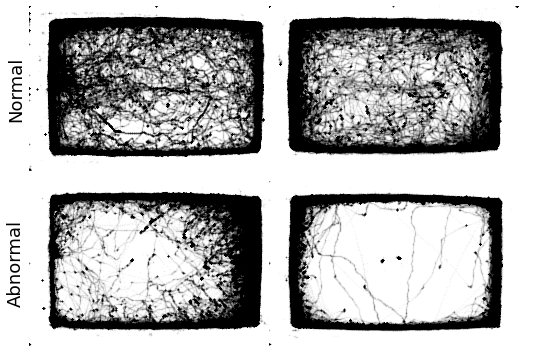

In [ ]:
ss = 1
alph = 0.025

fig, axs = plt.subplots(2,2,figsize=(8,5))

ax = axs[1,0]
x = mi['mex'].tolist()[::ss]
y = mi['mey'].tolist()[::ss]

ax.scatter(x,y,s=1,color='black',alpha=alph)
ax.set_xlim(0,1920)
ax.set_ylim(1200,0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_ylabel('Abnormal', fontsize=18)

ax = axs[1,1]
x = se['mex'].tolist()[::ss]
y = se['mey'].tolist()[::ss]

ax.scatter(x,y,s=1,color='black',alpha=alph)
ax.set_xlim(0,1920)
ax.set_ylim(1200,0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

ax = axs[0,0]
x = la['mex'].tolist()[::ss]
y = la['mey'].tolist()[::ss]

ax.scatter(x,y,s=1,color='black',alpha=alph)
ax.set_xlim(0,1920)
ax.set_ylim(1200,0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_ylabel('Normal', fontsize=18)

ax = axs[0,1]
x = kr['mex'].tolist()[::ss]
y = kr['mey'].tolist()[::ss]

ax.scatter(x,y,s=1,color='black',alpha=alph)
ax.set_xlim(0,1920)
ax.set_ylim(1200,0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plot_name = 'stressed-octopus.png'
path_plot = os.path.join(target_dir, plot_name)
fig.tight_layout(w_pad=-5)
fig.savefig(path_plot, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)